In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Questions to answer 
### - Which country has won the most prizes in each category?
### - What is the Gender gap? 
### - Which University has the most Noble Laureates?
### - Which year had the most Noble Laureates? 
### - Which decade had the most Noble Laureates? 

## Loading and understanding the dataset

In [227]:
df = pd.read_csv('nobel_laureates_data.csv')
#replaced 'Harvard Medical School' with harvard university to place all into one school
df['organizationName'] = df['organizationName'].replace('Harvard Medical School', 'Harvard University')
df.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,Qazvin International University,Iran,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,University of Bergen,Norway,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,Nanocrystals Technology Inc.,USA,New York NY


In [228]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 1000 rows and 13 columns.


In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000.0,1973.721,34.523195,1901.0,1949.75,1979.0,2003.00,2023.0
prizeShare,1000.0,2.027,0.944014,1.0,1.00,2.0,3.00,4.0
laureateID,1000.0,509.099,298.130617,1.0,250.75,500.5,764.25,1034.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 13 columns):

 #   Column               Non-Null Count  Dtype 

---  ------               --------------  ----- 

 0   year                 1000 non-null   int64 

 1   category             1000 non-null   object

 2   motivation           1000 non-null   object

 3   prizeShare           1000 non-null   int64 

 4   laureateID           1000 non-null   int64 

 5   fullName             1000 non-null   object

 6   gender               1000 non-null   object

 7   born                 1000 non-null   object

 8   bornCountry          970 non-null    object

 9   bornCity             966 non-null    object

 10  organizationName     776 non-null    object

 11  organizationCountry  773 non-null    object

 12  organizationCity     731 non-null    object

dtypes: int64(3), object(10)

memory usage: 101.7+ KB


In [231]:
df.duplicated().sum()

0

In [232]:
df.isnull().mean()*100

year                    0.0
category                0.0
motivation              0.0
prizeShare              0.0
laureateID              0.0
fullName                0.0
gender                  0.0
born                    0.0
bornCountry             3.0
bornCity                3.4
organizationName       22.4
organizationCountry    22.7
organizationCity       26.9
dtype: float64

22% of the the winners dont have a college attached to their name

In [233]:
df.isnull().sum()

year                     0
category                 0
motivation               0
prizeShare               0
laureateID               0
fullName                 0
gender                   0
born                     0
bornCountry             30
bornCity                34
organizationName       224
organizationCountry    227
organizationCity       269
dtype: int64

# EDA

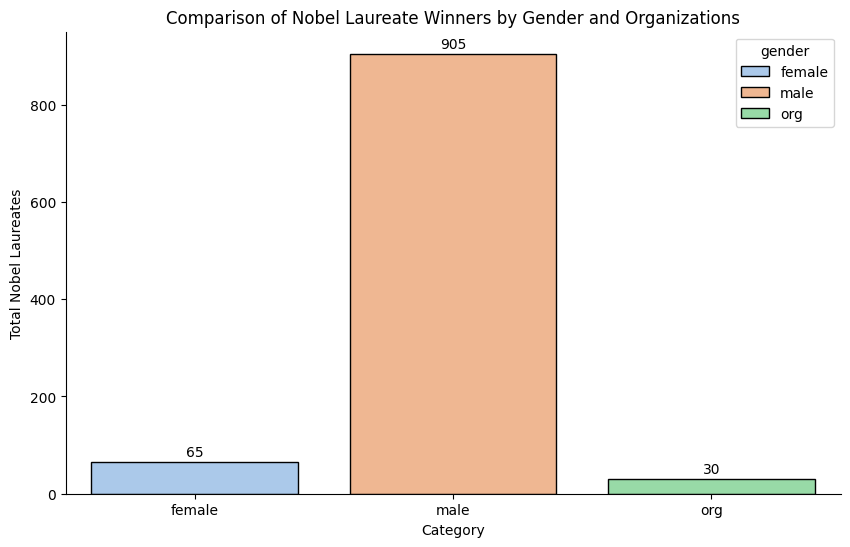

In [234]:
gender = df.groupby('gender').size().reset_index(name='total')

plt.figure(figsize=(10, 6))

sns.barplot(data=gender, x= 'gender', y='total', palette="pastel", hue='gender',edgecolor='black', legend=True)
plt.title('Comparison of Nobel Laureate Winners by Gender and Organizations')
plt.ylabel('Total Nobel Laureates')
plt.xlabel('Category')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0: 
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 7), 
                    textcoords = 'offset points')


plt.show()

Inference:
* According to the dataset, males make up for 90% of the Nobel Laureate Wins since 1901
* Females including organizations Nobel wins make up for less than 10% of data

## Analysis of Nobel Laureate Winners by Country and Gender

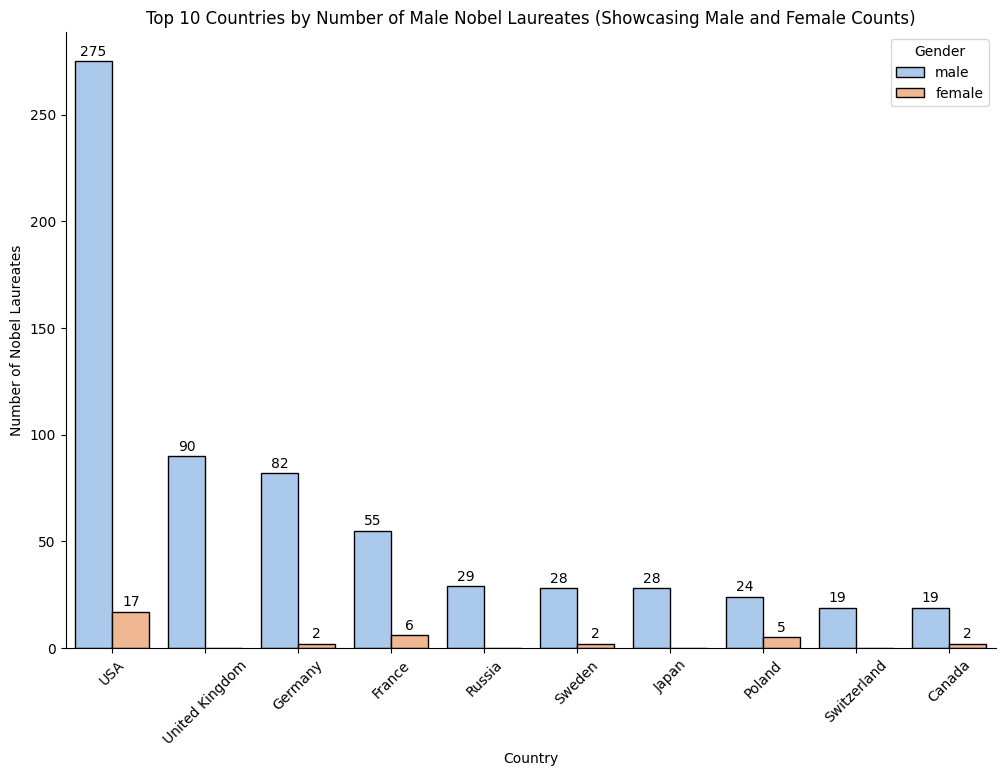

In [235]:
country_count = df.groupby(['bornCountry','gender']).size().unstack(fill_value=0)
country_count['total'] = country_count.sum(axis=1)
country_count = country_count.sort_values(by='male', ascending=False).head(10)
country_count = country_count.reset_index()
melted_country_count = country_count.melt(id_vars='bornCountry', value_vars=['male', 'female'], var_name='Gender', value_name='Count')


plt.figure(figsize=(12,8))
sns.barplot(data=melted_country_count, x='bornCountry', y='Count', hue='Gender', palette='pastel', edgecolor='black')

plt.title('Top 10 Countries by Number of Male Nobel Laureates (Showcasing Male and Female Counts)')
plt.ylabel('Number of Nobel Laureates')
plt.xlabel('Country')

plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',(p.get_x() + p.get_width()/2, height), ha = 'center', va = 'center', xytext = (0, 7),textcoords = 'offset points')

plt.show()

Inference:
* USA Dominance: The United States has the highest number of Nobel laureate winners, significantly leading in both male and female categories. This indicates a strong presence in various fields recognized by the Nobel committee.

* European Countries' Comparison: Although several European countries appear in the top 10, none come close to surpassing the USA in the total count of Nobel laureates. This suggests that while Europe has a substantial number of laureates, their distribution across countries makes it difficult for any single country to match the USA's dominance.

* The United Kingdom, Russia, Japan, and Switzerland dont have a single female winner 

### Number of Female Noble Laureates

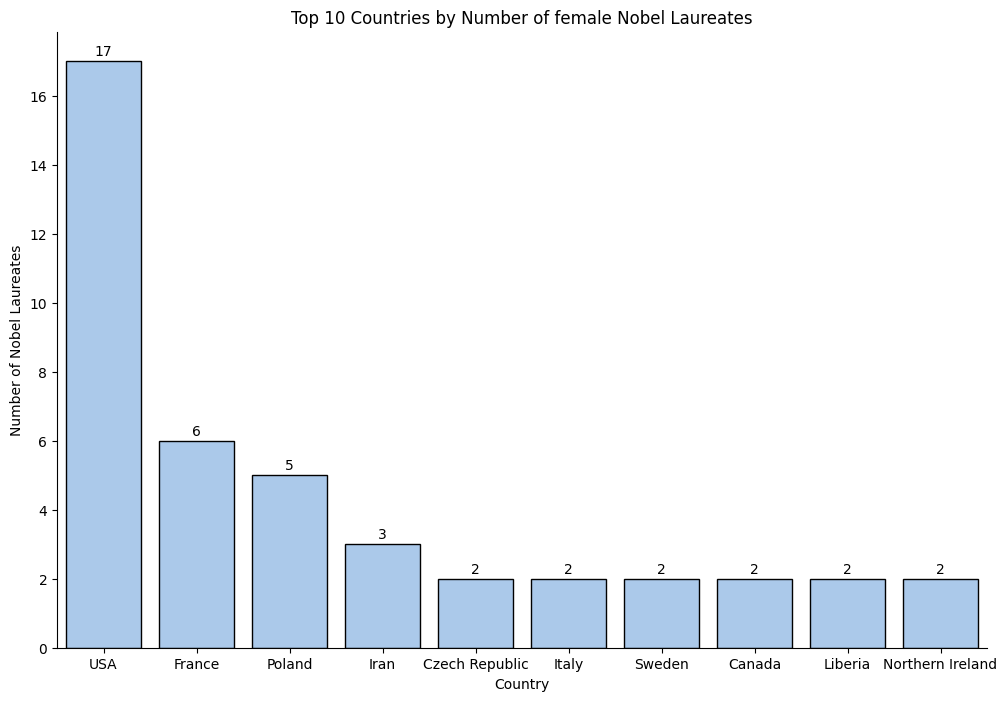

In [236]:
country_count = df.groupby(['bornCountry','gender']).size().unstack(fill_value=0)
country_count['total'] = country_count.sum(axis=1)
country_count = country_count.sort_values(by='female', ascending=False).head(10)
country_count = country_count.reset_index()
melted_country_count = country_count.melt(id_vars='bornCountry', value_vars=['female'], var_name='Gender', value_name='Count')

plt.figure(figsize=(12,8))
sns.barplot(data=melted_country_count, x='bornCountry', y='Count', hue='Gender', palette='pastel', edgecolor='black', legend=False)

plt.title('Top 10 Countries by Number of female Nobel Laureates')
plt.ylabel('Number of Nobel Laureates')
plt.xlabel('Country')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',(p.get_x() + p.get_width()/2, height), ha = 'center', va = 'center', xytext = (0, 7),textcoords = 'offset points')

plt.show()

Inference:
* The USA leads in female Nobel laureates, with about twice as many as France, the second-ranked country. After Iran, the numbers drop sharply, with most countries having two or fewer female laureates. This highlights significant disparities in female recognition globally.

## Number of Noble Laureates by Country

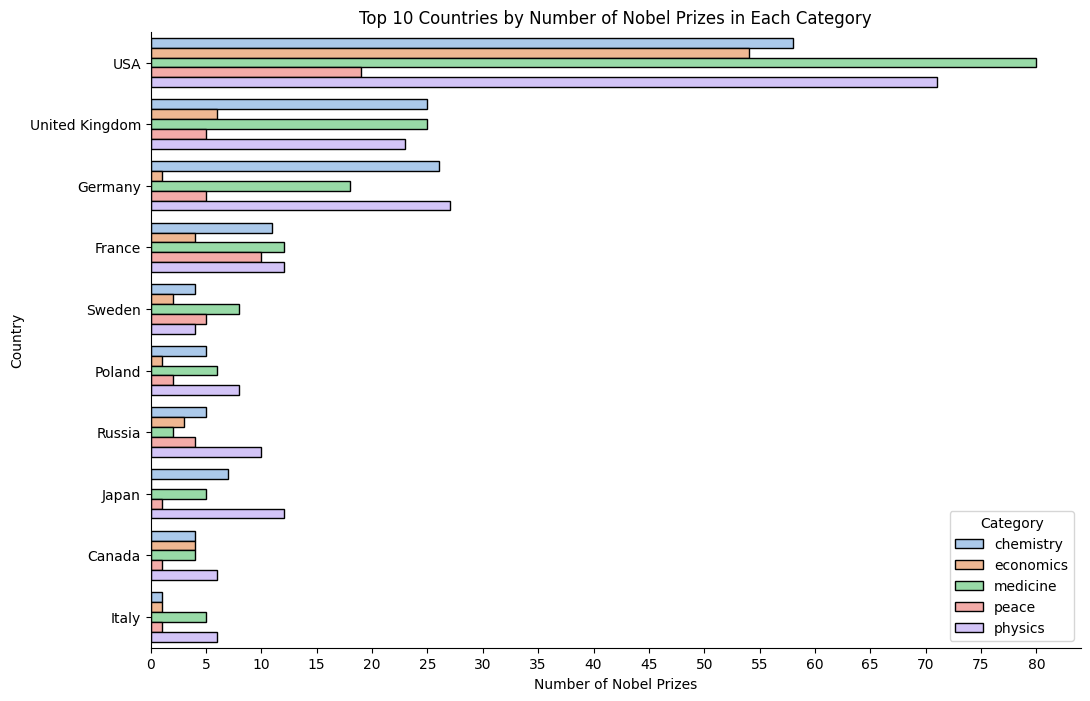

category,bornCountry,chemistry,economics,literature,medicine,peace,physics,total
0,USA,58,54,10,80,19,71,292
1,United Kingdom,25,6,6,25,5,23,90
2,Germany,26,1,7,18,5,27,84
3,France,11,4,12,12,10,12,61
4,Sweden,4,2,7,8,5,4,30
5,Poland,5,1,7,6,2,8,29
6,Russia,5,3,5,2,4,10,29
7,Japan,7,0,3,5,1,12,28
8,Canada,4,4,2,4,1,6,21
9,Italy,1,1,6,5,1,6,20


In [237]:
prize_count = df.groupby(['bornCountry', 'category']).size().unstack(fill_value=0)
prize_count['total'] = prize_count.sum(axis=1)
prize_count = prize_count.sort_values(by='total', ascending=False).head(10)
prize_count = prize_count.reset_index()

categories = ['chemistry', 'economics', 'medicine', 'peace', 'physics']
melted_prize_count = prize_count.melt(id_vars='bornCountry', value_vars=categories, var_name='Category', value_name='Count')

plt.figure(figsize=(12,8))
sns.barplot(data=melted_prize_count, x='Count', y='bornCountry', hue='Category', palette='pastel', edgecolor='black')

plt.title('Top 10 Countries by Number of Nobel Prizes in Each Category')
plt.xlabel('Number of Nobel Prizes')
plt.ylabel('Country')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(ticks=range(0, max(melted_prize_count['Count']) + 1, 5))

plt.show()
prize_count


Inference:
* USA's Dominance: According to the dataset, the United States has roughly double the number of Nobel laureates compared to the United Kingdom, which is the second-highest country, across every category.

## Number of Noble Laureates by University Attended

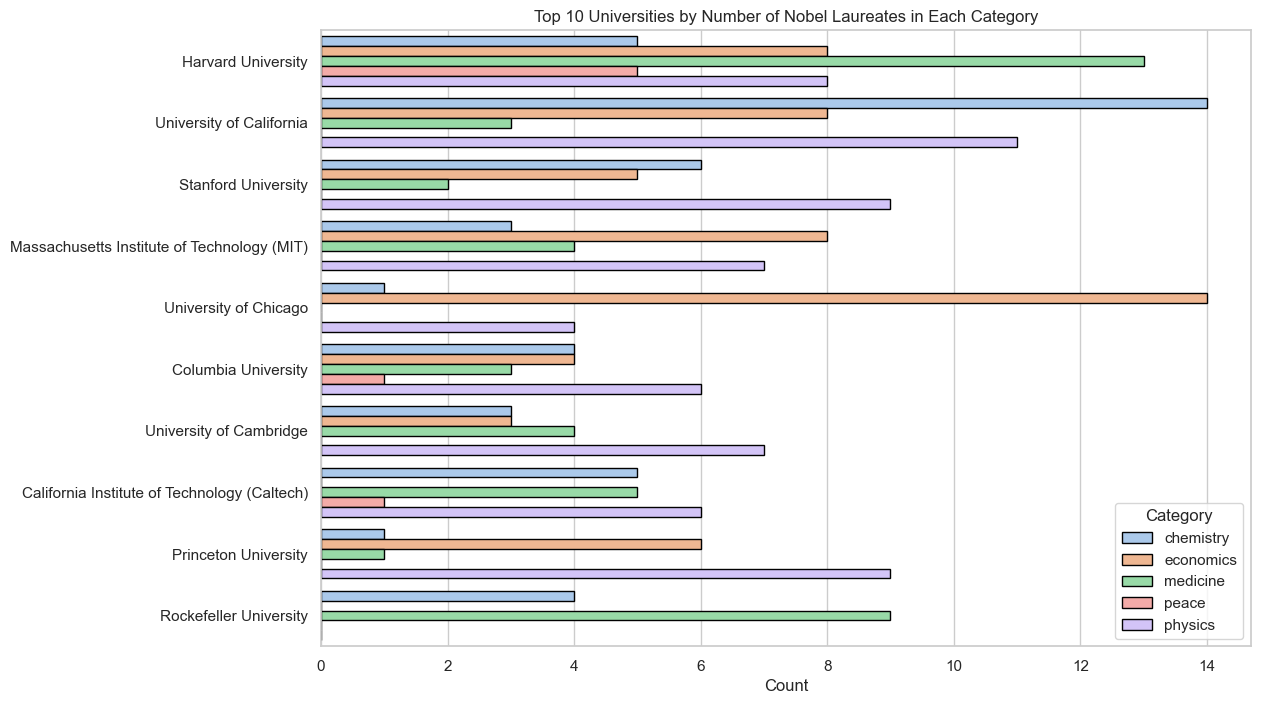

category,organizationName,chemistry,economics,literature,medicine,peace,physics,total
0,Harvard University,5,8,0,13,5,8,39
1,University of California,14,8,0,3,0,11,36
2,Stanford University,6,5,0,2,0,9,22
3,Massachusetts Institute of Technology (MIT),3,8,0,4,0,7,22
4,University of Chicago,1,14,0,0,0,4,19
5,Columbia University,4,4,0,3,1,6,18
6,University of Cambridge,3,3,0,4,0,7,17
7,California Institute of Technology (Caltech),5,0,0,5,1,6,17
8,Princeton University,1,6,0,1,0,9,17
9,Rockefeller University,4,0,0,9,0,0,13


In [314]:
college_count = df.groupby(['organizationName', 'category']).size().unstack(fill_value=0)
college_count['total'] = college_count.sum(axis=1)
college_count = college_count.sort_values(by='total', ascending=False).head(10)
college_count = college_count.reset_index()

categories = ['chemistry', 'economics','medicine', 'peace', 'physics']
melted_prize_count = college_count.melt(id_vars='organizationName', value_vars=categories, var_name='Category', value_name='Count')

plt.figure(figsize=(12,8))
sns.barplot(data=melted_prize_count, x='Count', y='organizationName', hue='Category', palette='pastel', edgecolor='black')

plt.title('Top 10 Universities by Number of Nobel Laureates in Each Category')
plt.xlabel('Count')
plt.ylabel('')

plt.show()

college_count

Inference:
* Harvard University Dominance: Harvard University has the highest number of Nobel Prize winners. The University of California system, when considering all its campuses collectively, holds the second position.
* Top Category Wins: The University of Chicago has the highest number of Nobel Prize wins in a single category, with 14 awards, followed by Harvard University with 13.
* Geographic Concentration: Nine out of the top ten institutions with the most Nobel Prize winners are based in the United States.
* None of the top 10 schools had anyone nominated for literature

Notes:

Data Completeness: The dataset has 22% of entries missing college affiliation information. Specifically, 224 winners do not have an associated college, which could potentially impact the analysis and conclusions drawn from the dataset.

## Nobel Laureates per year

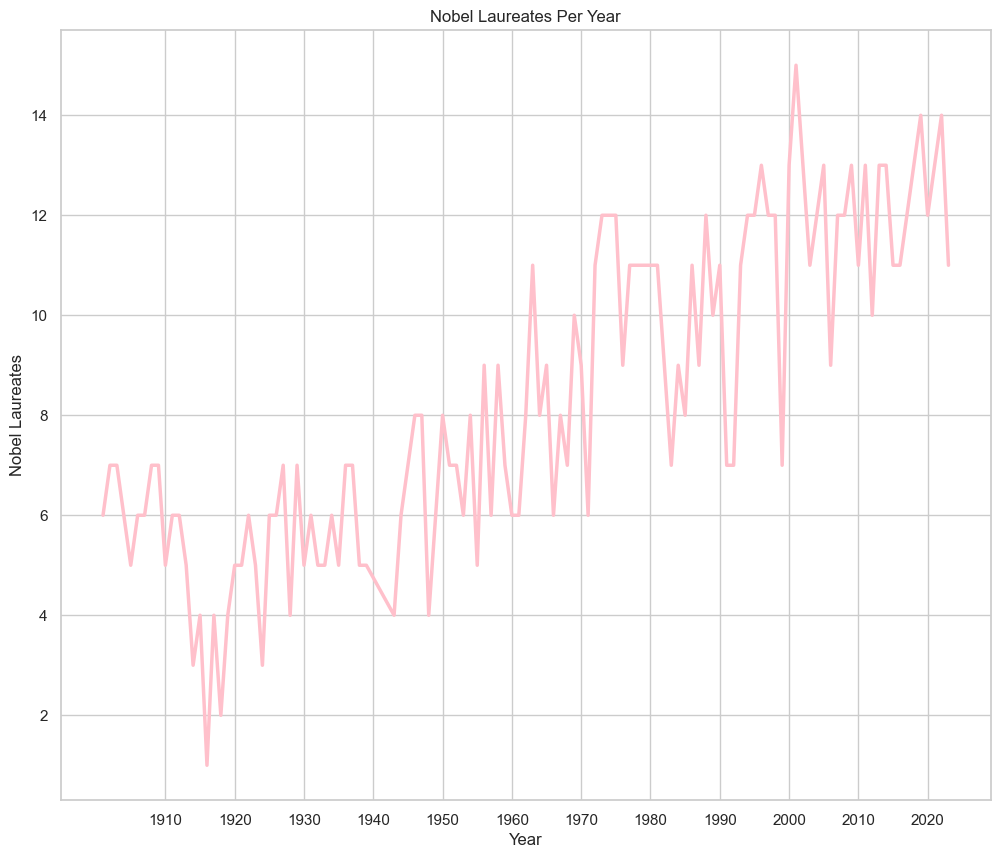

In [293]:
winners_by_year = df.groupby('year').size()

plt.figure(figsize=(12,10))

# sns.set_theme(style="whitegrid")
sns.lineplot(data=winners_by_year, color='pink', linewidth=2.5)

plt.title("Nobel Laureates Per Year")
plt.xlabel('Year')
plt.ylabel('Nobel Laureates')

plt.xticks(ticks=range(1910, winners_by_year.index.max() + 1, 10))

plt.show()

Inference:
* Peak Year Analysis:
The highest number of Nobel laureates was observed in 2001, with a total of 15 winners. This peak could be due to exceptional achievements across multiple categories in that year.

* Uniform Distribution:
The distribution of winners across the top 10 years was relatively uniform, indicating no significant spikes or drops in the number of laureates awarded each year. This suggests a steady recognition of achievements over these years.

* Consistency in Physics:
The physics category consistently produced 3 winners in all of the top years, highlighting the field's regular contribution to Nobel Prize awards. This consistency might reflect ongoing significant advancements in physics.

* Lowest Year: The year 1916 had the least number of Nobel laureates, with only one winner.

## Nobel Laureates per Decade

category  chemistry  economics  literature  medicine  peace  physics  total

decade                                                                     

2000             25         20          10        26     14       28    123

2010             27         20          10        24     14       26    121

1970             15         15          11        25     13       25    104

1990             18         17          10        20     17       22    104

1980             21         10          10        23     11       22     97

1960             15          2          11        25      9       17     79

1950             14          0          10        20      8       20     72

1900              9          0          10        11     14       13     57

1930             13          0           9        14      9       11     56

1920             10          0          10        11     11       12     54

2020             10          9           4         8      7       12     50


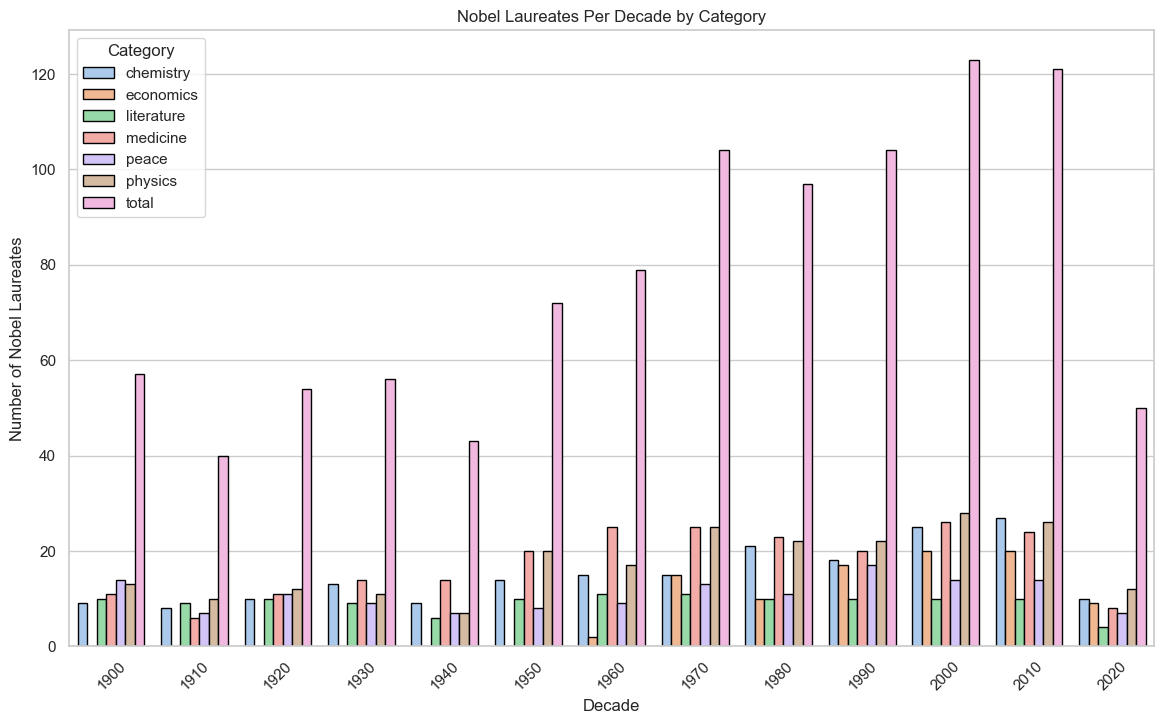

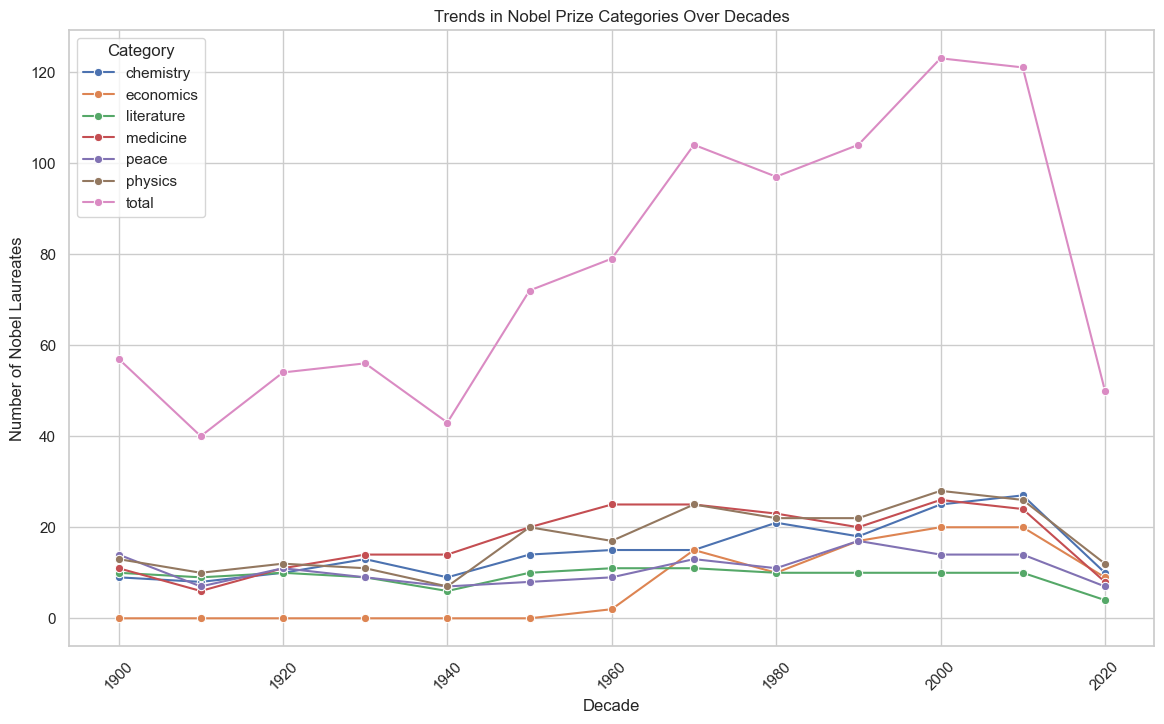

In [329]:
df['decade'] = (df['year'] // 10) * 10

decade_trends = df.groupby(['decade', 'category']).size().unstack(fill_value=0)
decade_trends['total'] = decade_trends.sum(axis=1)

print(decade_trends.sort_values(by='total', ascending=False))

# Melt the DataFrame for plotting
melted_decade_trends = decade_trends.reset_index().melt(id_vars='decade', var_name='Category', value_name='Count')

# Plot the total number of laureates by decade
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_decade_trends, x='decade', y='Count', hue='Category', palette='pastel', edgecolor='black')

plt.title('Nobel Laureates Per Decade by Category')
plt.xlabel('Decade')
plt.ylabel('Number of Nobel Laureates')
plt.legend(title='Category', loc='upper left')
plt.xticks(rotation=45)
plt.show()

# Plot trends over the decades
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_decade_trends, x='decade', y='Count', hue='Category', marker="o")

plt.title('Trends in Nobel Prize Categories Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Nobel Laureates')
plt.legend(title='Category', loc='upper left')
plt.xticks(rotation=45)
plt.show()


Inference: 
* Peak Decade Analysis: The 2000s emerged as the decade with the most Nobel laureates, indicating a possible increase in the recognition of scientific, literary, and peace efforts. This peak could be attributed to the expansion and diversification of research and achievements during this time.

* Decadal Trends: The 1970s and 1990s stand out as the only decades in the 20th century with over 100 Nobel laureates, suggesting significant advancements and breakthroughs during these periods. These decades likely experienced notable achievements in fields like medicine and physics.

* Early Years: The 1910s saw the least number of Nobel laureates, with only 40 winners. This reflects the early years of the Nobel Prize, when fewer categories existed and global participation was limited. The low number may also have been affected by World War I (1914–1918), which disrupted scientific and cultural activities.

* Overall Growth: There is a clear upward trend in the number of Nobel laureates over the decades, highlighting the increasing global contributions to the fields recognized by the Nobel Prize.

## Conclusion:
### The analysis of Nobel laureates reveals a significant gender disparity, with male laureates outnumbering female laureates by a wide margin. Despite ongoing efforts to promote gender equality, women remain underrepresented in many Nobel Prize categories. However, recent trends show a gradual increase in female laureates, reflecting positive changes in societal attitudes and opportunities for women in various fields.

### The United States stands out as the most dominant country in producing Nobel laureates, leading in both the overall and female categories. This dominance underscores the strong research infrastructure and academic environment in the USA, which supports innovation and excellence. Other countries like the United Kingdom, Germany, and France also show a strong presence but lag behind the USA in numbers.

### Overall, while progress has been made, there is still much work to be done to achieve a more balanced representation among Nobel laureates, especially in recognizing the contributions of women globally.